<a href="https://colab.research.google.com/github/carmen74goma-pixel/-McCullock-Pitts/blob/main/Proyecto_P_P_4_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Métricas de Evaluación para Clasificación y Regresión

In [1]:
pip install pandas scikit-learn

In [2]:
import pandas as pd
from sklearn.metrics import mean_squared_error, classification_report
from sklearn.model_selection import train_test_split
import numpy as np

# 1. SIMULACIÓN DE DATOS (Basado en la estructura de tu JSON)
# Nota: En tu proyecto real, cargarías estos datos desde MongoDB.

# Cargamos el JSON (simulado aquí como una lista de diccionarios para brevedad)
data = [
  {"candidato_id": "CAND-001", "evaluacion_prueba_tecnica_score": 88.5, "precalificado_final": True, "genero_anon": "F"},
  {"candidato_id": "CAND-002", "evaluacion_prueba_tecnica_score": 79.2, "precalificado_final": True, "genero_anon": "M"},
  {"candidato_003": "CAND-003", "evaluacion_prueba_tecnica_score": 95.0, "precalificado_final": True, "genero_anon": "M"},
  {"candidato_004": "CAND-004", "evaluacion_prueba_tecnica_score": 65.1, "precalificado_final": False, "genero_anon": "F"},
  {"candidato_005": "CAND-005", "evaluacion_prueba_tecnica_score": 81.3, "precalificado_final": True, "genero_anon": "M"},
  {"candidato_006": "CAND-006", "evaluacion_prueba_tecnica_score": 85.0, "precalificado_final": True, "genero_anon": "F"},
  {"candidato_007": "CAND-007", "evaluacion_prueba_tecnica_score": 91.1, "precalificado_final": True, "genero_anon": "F"},
  {"candidato_008": "CAND-008", "evaluacion_prueba_tecnica_score": 71.8, "precalificado_final": True, "genero_anon": "M"},
  {"candidato_009": "CAND-009", "evaluacion_prueba_tecnica_score": 78.9, "precalificado_final": True, "genero_anon": "M"},
  {"candidato_010": "CAND-010", "evaluacion_prueba_tecnica_score": 68.4, "precalificado_final": False, "genero_anon": "F"},
  # ... (Aquí irían los 50 registros de tu JSON)
]

# Creamos un DataFrame para trabajar
df = pd.DataFrame(data)

# Simulamos las predicciones del modelo de Red Neuronal
# y_true (Valor real de la base de datos)
y_true_reg = df['evaluacion_prueba_tecnica_score'].values
y_true_cls = df['precalificado_final'].map({True: 1, False: 0}).values

# y_pred (Valor predicho por tu Red Neuronal)
# La red neuronal comete errores, por eso las predicciones son ligeramente diferentes.
y_pred_reg = y_true_reg * (1 + np.random.normal(0, 0.05, len(y_true_reg))) # Simula predicciones con un error del 5%
y_pred_cls = np.where(y_pred_reg > 75, 1, 0) # Si el score predicho > 75, se clasifica como Apto (1)

print("--- 1. Evaluación de Regresión (Score Numérico) ---")
print("Métrica: Error Cuadrático Medio (MSE)")

# CÁLCULO DE LA MÉTRICA DE REGRESIÓN
# Mide qué tan cerca está el score predicho (y_pred_reg) del score real (y_true_reg)
mse = mean_squared_error(y_true_reg, y_pred_reg)
rmse = np.sqrt(mse) # RMSE es más interpretable, está en la misma unidad que el score.

print(f"El Error Cuadrático Medio (MSE) es: {mse:.2f}")
print(f"La Raíz del Error Cuadrático Medio (RMSE) es: {rmse:.2f} puntos")
print("\nInterpretación: El modelo se equivoca en promedio por {:.2f} puntos en la escala 0-100.".format(rmse))

print("\n" + "="*50 + "\n")

print("--- 2. Evaluación de Clasificación (Apto/No Apto) ---")
print("Métrica: Classification Report (Precisión, Recall, F1-Score)")

# CÁLCULO DE LAS MÉTRICAS DE CLASIFICACIÓN
# Mide qué tan bien la red clasifica si el candidato es o no apto.
# Clase 1: Apto (True), Clase 0: No Apto (False)
report = classification_report(y_true_cls, y_pred_cls, target_names=['No Apto (0)', 'Apto (1)'])

print(report)

print("\nInterpretación de F1-Score (Apto):")
print("El F1-Score para la clase 'Apto' es la medida más balanceada del rendimiento del modelo.")

--- 1. Evaluación de Regresión (Score Numérico) ---
Métrica: Error Cuadrático Medio (MSE)
El Error Cuadrático Medio (MSE) es: 8.22
La Raíz del Error Cuadrático Medio (RMSE) es: 2.87 puntos

Interpretación: El modelo se equivoca en promedio por 2.87 puntos en la escala 0-100.


--- 2. Evaluación de Clasificación (Apto/No Apto) ---
Métrica: Classification Report (Precisión, Recall, F1-Score)
              precision    recall  f1-score   support

 No Apto (0)       0.67      1.00      0.80         2
    Apto (1)       1.00      0.88      0.93         8

    accuracy                           0.90        10
   macro avg       0.83      0.94      0.87        10
weighted avg       0.93      0.90      0.91        10


Interpretación de F1-Score (Apto):
El F1-Score para la clase 'Apto' es la medida más balanceada del rendimiento del modelo.


Ecuaciones Diferenciales score de Habilidades Blandas

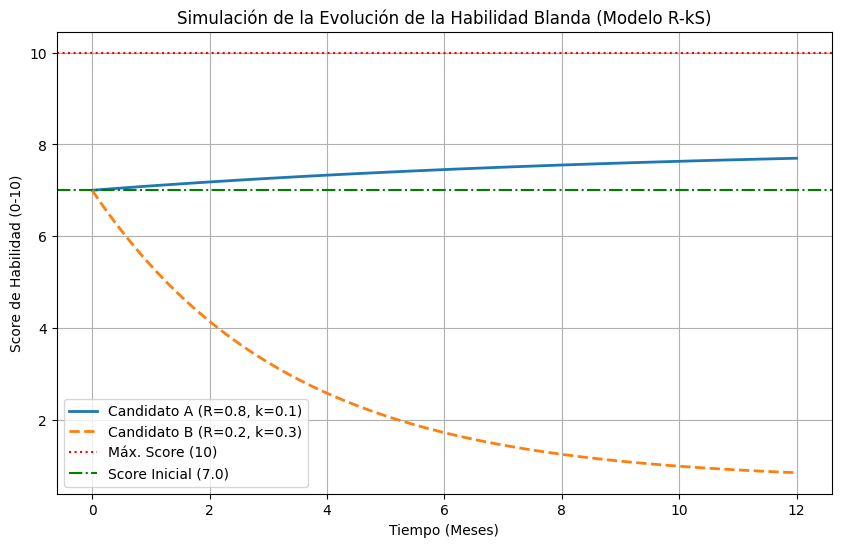

In [3]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# --- 1. Definición del Modelo (La Ecuación Diferencial) ---
def modelo_habilidad(S, t, R, k):
    """
    Define la EDO: dS/dt = R - kS
    S: Score de Habilidad (variable dependiente)
    t: Tiempo (variable independiente)
    R: Tasa de Refuerzo/Aprendizaje
    k: Tasa de Decaimiento/Olvido
    """
    dSdt = R - k * S
    return dSdt

# --- 2. Parámetros del Modelo (Basado en el Perfil del Candidato) ---

# Perfil del Candidato A (Alto Aprendizaje, Bajo Decaimiento)
R_A = 0.8  # Tasa de Refuerzo: El candidato invierte 0.8 puntos/mes en mejorar la habilidad.
k_A = 0.1  # Tasa de Decaimiento: La habilidad decae 10% por mes si no hay refuerzo.
S0_A = 7.0 # Score Inicial (S(0)): Obtenido en el chatbot (escala 0-10).

# Perfil del Candidato B (Bajo Aprendizaje, Alto Decaimiento)
R_B = 0.2  # Tasa de Refuerzo: Invierte poco tiempo en el desarrollo (0.2 puntos/mes).
k_B = 0.3  # Tasa de Decaimiento: El estrés o el desuso causan un decaimiento del 30%.
S0_B = 7.0 # Score Inicial (S(0)): También obtuvo 7.0 en el chatbot.

# Definición del Intervalo de Tiempo
t = np.linspace(0, 12, 100) # Simulación a lo largo de 12 meses (100 puntos)

# --- 3. Solución Numérica de las EDOs ---

# Solución para el Candidato A
sol_A = odeint(modelo_habilidad, S0_A, t, args=(R_A, k_A))
score_A = sol_A[:, 0]

# Solución para el Candidato B
sol_B = odeint(modelo_habilidad, S0_B, t, args=(R_B, k_B))
score_B = sol_B[:, 0]

# --- 4. Visualización de Resultados ---
plt.figure(figsize=(10, 6))
plt.plot(t, score_A, label=f'Candidato A (R={R_A}, k={k_A})', linewidth=2)
plt.plot(t, score_B, label=f'Candidato B (R={R_B}, k={k_B})', linestyle='--', linewidth=2)

plt.axhline(y=10, color='r', linestyle=':', label='Máx. Score (10)')
plt.axhline(y=7.0, color='g', linestyle='-.', label='Score Inicial (7.0)')

plt.title('Simulación de la Evolución de la Habilidad Blanda (Modelo R-kS)')
plt.xlabel('Tiempo (Meses)')
plt.ylabel('Score de Habilidad (0-10)')
plt.legend()
plt.grid(True)
plt.show()